# Read base datasets

In [54]:
import pandas as pd

# Read the CSV file into a DataFrame
espoo_pop = pd.read_csv("Espoo.csv") # Espoo's population
hel_pop = pd.read_csv("Helsinki.csv") # Helsinki's population
lat_lon = pd.read_csv("lat_lon.csv") # Latitudes and longitudes of different regions
route = pd.read_csv("route_info.csv") # Total distance and total duration of different routes

In [25]:
lat_lon

,Region,Subregion 1,Subregion 2,Lat,Lon
0,Espoo,049 1 Suur-Leppävaara,049 11 Kanta-Leppävaara,60.2151,24.8092
1,Espoo,049 1 Suur-Leppävaara,049 13 Kilo-Karakallio,60.2151,24.8092
2,Espoo,049 1 Suur-Leppävaara,049 14 Laaksolahti,60.2151,24.8092
3,Espoo,049 1 Suur-Leppävaara,049 15 Viherlaakso-Lippajärvi,60.2151,24.8092
4,Espoo,049 1 Suur-Leppävaara,049 16 Sepänkylä,60.2151,24.8092
...,...,...,...,...,...
994,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN


In [26]:
espoo_pop

,Unnamed: 0,0-6,7-12,13-15,16-19,20-29,30-39,40-49,50-64,65-74,75-84,Over 85,Total population
0,049 1 Suur-Leppävaara,6283,5708,2782,3357,10341,12904,10528,12331,5736,3516,1138,74624
1,049 2 Suur-Tapiola,3610,3573,1731,2247,9092,7814,6827,8178,4659,3120,1139,51990
2,049 3 Suur-Matinkylä,3258,3112,1416,1766,6192,7508,5848,6980,4134,2802,715,43731
3,049 4 Suur-Espoonlahti,4457,4837,2442,2904,5192,8040,8528,11034,5621,3490,888,57433
4,049 5 Suur-Kauklahti,1277,1299,604,642,1187,1980,2083,1978,650,312,107,12119
5,049 6 Vanha-Espoo,3602,3412,1669,2008,4717,6486,6208,7638,3240,1542,333,40855
6,049 7 Pohjois-Espoo,1076,1230,606,710,828,1560,1944,2463,870,401,110,11798
7,049 999 Muut,167,229,188,262,894,867,680,650,228,181,236,4582


In [27]:
hel_pop

,Unnamed: 0,0-6,7-12,13-15,16-19,20-29,30-39,40-49,50-64,65-74,75-84,Over 85,Total
0,091 1 Eteläinen suurpiiri,7216,5968,2650,3536,22791,22230,16498,19312,11020,7700,2236,121157
1,091 2 Läntinen suurpiiri,7419,6238,2858,3919,17570,20295,14285,18713,10898,6956,2894,112045
2,091 3 Keskinen suurpiiri,5160,3718,1436,2585,22512,22524,12902,13745,8038,4446,1574,98640
3,091 4 Pohjoinen suurpiiri,3293,3401,1584,1901,3599,6071,6227,8152,4645,2902,1198,42973
4,091 5 Koillinen suurpiiri,7902,7256,3372,4117,11639,16035,13163,18333,10076,5648,1810,99351
5,091 6 Kaakkoinen suurpiiri,4296,3736,1606,2014,7089,9751,7818,10321,5574,3323,1200,56728
6,091 7 Itäinen suurpiiri,8267,7428,3673,4772,12901,16724,14277,22629,11606,7579,2997,112853
7,091 8 Östersundomin suurpiiri,82,137,95,153,129,117,261,595,135,90,15,1809
8,091 999 Muut,395,557,352,558,2930,2777,1930,1980,696,372,354,12901


# Combine and clean data

## Process lat_lon dataset

In [28]:
# Drop NaN in lat_lon dataset
lat_lon.dropna(inplace = True)
lat_lon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       60 non-null     object 
 1   Subregion 1  60 non-null     object 
 2   Subregion 2  60 non-null     object 
 3   Lat          60 non-null     float64
 4   Lon          60 non-null     float64
dtypes: float64(2), object(3)
memory usage: 2.8+ KB


In [29]:
# Make region name unique with corresponding lat, lon
lat_lon = lat_lon.groupby("Subregion 1").agg({"Lat": "first", "Lon": "first"})
lat_lon

,Lat,Lon
Subregion 1,,
049 1 Suur-Leppävaara,60.2151,24.8092
049 2 Suur-Tapiola,60.1775,24.8131
049 3 Suur-Matinkylä,60.1627,24.7528
049 4 Suur-Espoonlahti,60.1760,24.6458
049 5 Suur-Kauklahti,60.1866,24.5896
049 6 Vanha-Espoo,60.2016,24.6627
049 7 Pohjois-Espoo,60.2924,24.5316
1 Eteläinen suurpiiri,60.1681,24.9306
2 Läntinen suurpiiri,60.1946,24.8774


In [30]:
# Reset index to get 'Subregion 1' column
lat_lon.reset_index(inplace=True)

lat_lon

,Subregion 1,Lat,Lon
0,049 1 Suur-Leppävaara,60.2151,24.8092
1,049 2 Suur-Tapiola,60.1775,24.8131
2,049 3 Suur-Matinkylä,60.1627,24.7528
3,049 4 Suur-Espoonlahti,60.1760,24.6458
4,049 5 Suur-Kauklahti,60.1866,24.5896
5,049 6 Vanha-Espoo,60.2016,24.6627
6,049 7 Pohjois-Espoo,60.2924,24.5316
7,1 Eteläinen suurpiiri,60.1681,24.9306
8,2 Läntinen suurpiiri,60.1946,24.8774
9,3 Keskinen suurpiiri,60.1834,24.9506


In [31]:
# Remove numbers in 'Subregion 1' column
import re

areas = []
for i, row in lat_lon.iterrows():
    area = re.sub(r'\d+', '',str(row['Subregion 1']))
    areas.append(area)
lat_lon['Subregion 1'] = areas

lat_lon

,Subregion 1,Lat,Lon
0,Suur-Leppävaara,60.2151,24.8092
1,Suur-Tapiola,60.1775,24.8131
2,Suur-Matinkylä,60.1627,24.7528
3,Suur-Espoonlahti,60.1760,24.6458
4,Suur-Kauklahti,60.1866,24.5896
5,Vanha-Espoo,60.2016,24.6627
6,Pohjois-Espoo,60.2924,24.5316
7,Eteläinen suurpiiri,60.1681,24.9306
8,Läntinen suurpiiri,60.1946,24.8774
9,Keskinen suurpiiri,60.1834,24.9506


## Process population datasets

In [32]:
# Change column names
espoo_pop = espoo_pop.rename(columns={'Unnamed: 0': 'Subregion 1'})
hel_pop = hel_pop.rename(columns={'Unnamed: 0': 'Subregion 1', 'Total':'Total population'})

## Combine datasets

In [33]:
# Join 2 population datasets
merged_pop = pd.concat([espoo_pop, hel_pop], ignore_index=True)

In [34]:
merged_pop

,Subregion 1,0-6,7-12,13-15,16-19,20-29,30-39,40-49,50-64,65-74,75-84,Over 85,Total population
0,049 1 Suur-Leppävaara,6283,5708,2782,3357,10341,12904,10528,12331,5736,3516,1138,74624
1,049 2 Suur-Tapiola,3610,3573,1731,2247,9092,7814,6827,8178,4659,3120,1139,51990
2,049 3 Suur-Matinkylä,3258,3112,1416,1766,6192,7508,5848,6980,4134,2802,715,43731
3,049 4 Suur-Espoonlahti,4457,4837,2442,2904,5192,8040,8528,11034,5621,3490,888,57433
4,049 5 Suur-Kauklahti,1277,1299,604,642,1187,1980,2083,1978,650,312,107,12119
5,049 6 Vanha-Espoo,3602,3412,1669,2008,4717,6486,6208,7638,3240,1542,333,40855
6,049 7 Pohjois-Espoo,1076,1230,606,710,828,1560,1944,2463,870,401,110,11798
7,049 999 Muut,167,229,188,262,894,867,680,650,228,181,236,4582
8,091 1 Eteläinen suurpiiri,7216,5968,2650,3536,22791,22230,16498,19312,11020,7700,2236,121157
9,091 2 Läntinen suurpiiri,7419,6238,2858,3919,17570,20295,14285,18713,10898,6956,2894,112045


In [35]:
# Remove numbers in 'Subregion 1' column
import re

areas = []
for i, row in merged_pop.iterrows():
    area = re.sub(r'\d+', '',str(row['Subregion 1']))
    areas.append(area)
merged_pop['Subregion 1'] = areas

In [36]:
# Filter out 'Muut' rows (other regions)
merged_pop = merged_pop[~merged_pop['Subregion 1'].str.contains('Muut')]

In [37]:
merged_pop

,Subregion 1,0-6,7-12,13-15,16-19,20-29,30-39,40-49,50-64,65-74,75-84,Over 85,Total population
0,Suur-Leppävaara,6283,5708,2782,3357,10341,12904,10528,12331,5736,3516,1138,74624
1,Suur-Tapiola,3610,3573,1731,2247,9092,7814,6827,8178,4659,3120,1139,51990
2,Suur-Matinkylä,3258,3112,1416,1766,6192,7508,5848,6980,4134,2802,715,43731
3,Suur-Espoonlahti,4457,4837,2442,2904,5192,8040,8528,11034,5621,3490,888,57433
4,Suur-Kauklahti,1277,1299,604,642,1187,1980,2083,1978,650,312,107,12119
5,Vanha-Espoo,3602,3412,1669,2008,4717,6486,6208,7638,3240,1542,333,40855
6,Pohjois-Espoo,1076,1230,606,710,828,1560,1944,2463,870,401,110,11798
8,Eteläinen suurpiiri,7216,5968,2650,3536,22791,22230,16498,19312,11020,7700,2236,121157
9,Läntinen suurpiiri,7419,6238,2858,3919,17570,20295,14285,18713,10898,6956,2894,112045
10,Keskinen suurpiiri,5160,3718,1436,2585,22512,22524,12902,13745,8038,4446,1574,98640


In [38]:
lat_lon['Subregion 1'] = lat_lon['Subregion 1'].str.strip().str.title()
merged_pop['Subregion 1'] = merged_pop['Subregion 1'].str.strip().str.title()

/tmp/ipykernel_244/3514462599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
# Merge population dataset with lat_lon dataset
merged_pop = pd.merge(merged_pop, lat_lon, on='Subregion 1')

In [40]:
merged_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Subregion 1       15 non-null     object 
 1   0-6               15 non-null     int64  
 2   7-12              15 non-null     int64  
 3   13-15             15 non-null     int64  
 4   16-19             15 non-null     int64  
 5   20-29             15 non-null     int64  
 6   30-39             15 non-null     int64  
 7   40-49             15 non-null     int64  
 8   50-64             15 non-null     int64  
 9   65-74             15 non-null     int64  
 10  75-84             15 non-null     int64  
 11  Over 85           15 non-null     int64  
 12  Total population  15 non-null     int64  
 13  Lat               15 non-null     float64
 14  Lon               15 non-null     float64
dtypes: float64(2), int64(12), object(1)
memory usage: 1.9+ KB


In [41]:
merged_pop.to_csv('merged_pop.csv', index=False)

# Visualisations

## An open street map indicating the size and distribution of the population

In [42]:
import plotly.express as px

fig = px.scatter_mapbox(
    merged_pop,  # Our DataFrame
    lat="Lat",
    lon="Lon",
    size="Total population",
    center={"lat": 60.2151, "lon": 24.8092},  # Map will be centered on Helsinki
    width=600,  # Width of map
    height=700,  # Height of map
    size_max=20,
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

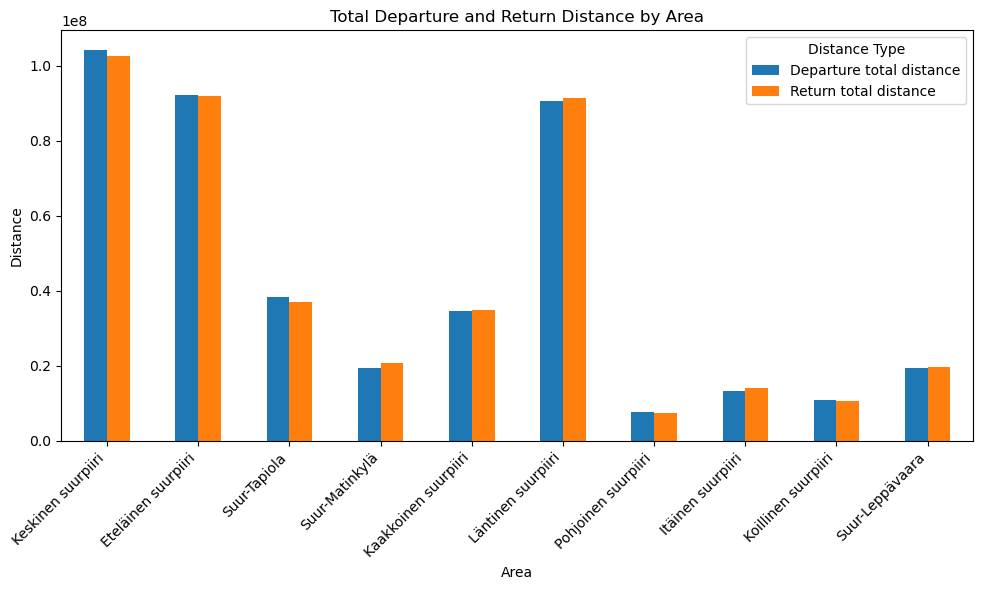

In [59]:
import matplotlib.pyplot as plt


# Set the 'Area' column as the index for easier plotting
route.set_index('Area', inplace=True)

# Plotting
route[['Departure total distance', 'Return total distance']].plot(kind='bar', figsize=(10, 6))
plt.title('Total Departure and Return Distance by Area')
plt.xlabel('Area')
plt.ylabel('Distance')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Distance Type')
plt.tight_layout()
plt.show()

In [72]:
import matplotlib.pyplot as plt

# Get unique regions
regions = route['Area'].unique()

# Define colors for each region
colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'black', 'brown']

# Plotting
plt.figure(figsize=(10, 6))
for i, region in enumerate(regions):
    region_df = route[route['Area'] == region]
    plt.scatter(region_route['Departure total duration'], region_route['Return total duration'], color=colors[i], alpha=0.5, label=region)

plt.title('Departure vs. Return Duration')
plt.xlabel('Departure Total Duration')
plt.ylabel('Return Total Duration')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

KeyError: 'Area'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
espoo_pop = pd.read_csv("Group project/Espoo.csv")

# Set the region names as index
espoo_pop.set_index(espoo_pop.columns[0], inplace=True)

# Remove the last column (Total population)
espoo_pop = espoo_pop.iloc[:, :-1]

# Convert string numbers to integers and convert to thousands for plotting
espoo_pop = espoo_pop.astype(int) / 1000

# Rename the regions
region_names = {
    '049 1 Suur-Leppävaara': 'Leppävaara',
    '049 2 Suur-Tapiola': 'Tapiola',
    '049 3 Suur-Matinkylä': 'Matinkylä',
    '049 4 Suur-Espoonlahti': 'Espoonlahti',
    '049 5 Suur-Kauklahti': 'Kauklahti',
    '049 6 Vanha-Espoo': 'Vanha-Espoo',
    '049 7 Pohjois-Espoo': 'Pohjois-Espoo',
    '049 999 Muut': 'Other'
}

espoo_pop.rename(index=region_names, inplace=True)

# Reverse the order of rows
espoo_pop = espoo_pop.iloc[::-1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the horizontal stacked bar chart
espoo_pop.plot(kind='barh', stacked=True)

plt.title('Population distribution by region and age group in Espoo in 2021')
plt.xlabel('Population (thousands)')
plt.ylabel('Region')
plt.legend(title='Age group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Group project/Espoo.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
hel_pop = pd.read_csv("Group project/Helsinki.csv")

# Set the region names as index
hel_pop.set_index(hel_pop.columns[0], inplace=True)

# Remove the last column (Total)
hel_pop = hel_pop.iloc[:, :-1]

# Convert string numbers to integers and convert to thousands for plotting
hel_pop = hel_pop.astype(int) / 1000

# Rename the regions
region_names = {
    '091 1 Eteläinen suurpiiri': 'Southern',
    '091 2 Läntinen suurpiiri': 'Western',
    '091 3 Keskinen suurpiiri': 'Central',
    '091 4 Pohjoinen suurpiiri': 'Northern',
    '091 5 Koillinen suurpiiri': 'Northeastern',
    '091 6 Kaakkoinen suurpiiri': 'Southeastern',
    '091 7 Itäinen suurpiiri': 'Eastern',
    '091 8 Östersundomin suurpiiri': 'Östersundom',
    '091 999 Muut': 'Other'
}

hel_pop.rename(index=region_names, inplace=True)

# Reverse the order of rows
hel_pop = hel_pop.iloc[::-1]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the horizontal stacked bar chart
hel_pop.plot(kind='barh', stacked=True)

plt.title('Population distribution by region and age group in Helsinki in 2021')
plt.xlabel('Population (thousands)')
plt.ylabel('Region')
plt.legend(title='Age group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show();

In [ ]:
route = pd.read_csv("Group project/route.csv")
route

In [18]:
# not run this code
import re
subregions = pd.read_csv("Group project/subregions.csv")
areas = []
for i, row in subregions.iterrows():
    area = re.sub(r'\d+', '',str(row['Subregion 1']))
    areas.append(area)
subregions['Area']= areas
subregions = subregions.drop(columns = ['Subregion 1'])


FileNotFoundError: [Errno 2] No such file or directory: 'Group project/subregions.csv'

In [69]:
# not run this code
subregion_counts = subregions.groupby("Area")["Subregion 2"].nunique()
subregions = subregions.merge(subregion_counts, on="Area", suffixes=("", "_count"))
subregions.head()

,Region,Subregion 2,Area,Subregion 2_count
0,Espoo,049 11 Kanta-Leppävaara,Suur-Leppävaara,5
1,Espoo,049 13 Kilo-Karakallio,Suur-Leppävaara,5
2,Espoo,049 14 Laaksolahti,Suur-Leppävaara,5
3,Espoo,049 15 Viherlaakso-Lippajärvi,Suur-Leppävaara,5
4,Espoo,049 16 Sepänkylä,Suur-Leppävaara,5


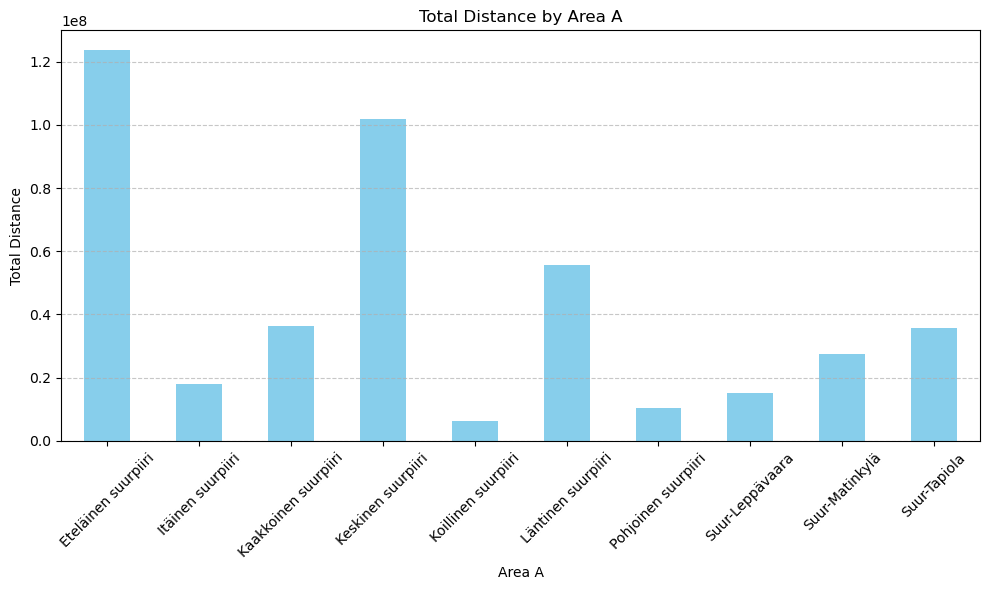

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
routes_df = pd.read_csv("Group project/route.csv")

# Calculate the total distance for each Area A
total_distance_by_area = routes_df.groupby('Area A')['Distance'].sum()

# Plotting
plt.figure(figsize=(10, 6))
total_distance_by_area.plot(kind='bar', color='skyblue')

plt.title('Total Distance by Area A')
plt.xlabel('Area A')
plt.ylabel('Total Distance')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
